In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import random
import sklearn as sk
from time import time
import pickle

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from utils import calc_cc, calc_dist, calc_emd, number_of_fake_edges, read_mtx_graph

In [5]:
from rand_pert import rand_pertub, link_mirage, smart_link_anon, smart_pertub, calc_features

In [6]:
%%time
from_file = False
#filename = "data/p2p-Gnutella08/p2p-Gnutella08.mtx"
filename = "data/ca-AstroPh/ca-AstroPh.mtx"

if from_file:
    g = read_mtx_graph(filename)
else:
    #g = nx.erdos_renyi_graph(n=1000, p=0.1)
    g = nx.powerlaw_cluster_graph(n=4000, m=30, p=0.1)



CPU times: user 700 ms, sys: 36 ms, total: 736 ms
Wall time: 717 ms


In [7]:
print(g.number_of_edges())
print(g.number_of_nodes())


118825
4000


In [8]:
print(g.number_of_edges())
print(g.number_of_nodes())


118825
4000


### Split the graph

In [9]:
from attack import *

In [10]:
alpha = 0.25

In [11]:
%%time
G1, G2 = edge_split(g, alpha)

CPU times: user 756 ms, sys: 20 ms, total: 776 ms
Wall time: 757 ms


In [14]:
G1.number_of_nodes()

3997

In [12]:
M = 10
t = 3

In [13]:
%%time
f = calc_features(G1)
G_aux = smart_link_anon(G1, M, t, 0.5, f)

(35, ' ', 3998, ' not in feature list')
3997


NameError: global name 'exit' is not defined

In [68]:
%%time
f = calc_features(G2)
G_san = smart_link_anon(G2, M, t, 0.5, f)

CPU times: user 2.09 s, sys: 32 ms, total: 2.12 s
Wall time: 2.09 s


In [40]:
print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G1, G_aux))
print("% of distortion")
print(calc_dist(G1, G_aux))
print(" EMD of deg distibution")
print(calc_emd(G1, G_aux))
print(" CC diff")
print(calc_cc(G1, G_aux))

print("Originial edges ", G2.number_of_edges(), " Now edges ", G_san.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G2, G_san))
print("% of distortion")
print(calc_dist(G2, G_san))
print(" EMD of deg distibution")
print(calc_emd(G2, G_san))
print(" CC diff")
print(calc_cc(G2, G_san))


('Originial edges ', 15439, ' Now edges ', 9563)
% of fake edges
0.26811669978
% of distortion
1.16607293218
 EMD of deg distibution
11.7543336875
 CC diff
0.0284202205689
('Originial edges ', 21325, ' Now edges ', 13236)
% of fake edges
0.317618615896
% of distortion
1.19713950762
 EMD of deg distibution
16.1790759731
 CC diff
0.0166645595135


In [24]:
%%time
G_aux = smart_pertub(G1, M, t, 0.44, f, cache)

CPU times: user 5.06 s, sys: 24 ms, total: 5.08 s
Wall time: 5.04 s


In [25]:
%%time
cache = {}
f = calc_features(G2)
G_san = smart_pertub(G2, M, t, 0.44, f, cache)

CPU times: user 7.24 s, sys: 16 ms, total: 7.26 s
Wall time: 7.22 s


In [32]:
print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G1, G_aux))
print("% of distortion")
print(calc_dist(G1, G_aux))
print(" EMD of deg distibution")
print(calc_emd(G1, G_aux))
print(" CC diff")
print(calc_cc(G1, G_aux))

print("Originial edges ", G2.number_of_edges(), " Now edges ", G_san.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G2, G_san))
print("% of distortion")
print(calc_dist(G2, G_san))
print(" EMD of deg distibution")
print(calc_emd(G2, G_san))
print(" CC diff")
print(calc_cc(G2, G_san))


('Originial edges ', 15423, ' Now edges ', 13569)
% of fake edges
0.886211216744
% of distortion
1.77967969915
 EMD of deg distibution
6.17572323844
 CC diff
0.0598829019247
('Originial edges ', 21246, ' Now edges ', 18790)
% of fake edges
0.923629590208
% of distortion
1.81685964417
 EMD of deg distibution
5.76138723634
 CC diff
0.0124871524119


In [17]:
print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G1, G_aux))
print("% of distortion")
print(calc_dist(G1, G_aux))
print(" EMD of deg distibution")
print(calc_emd(G1, G_aux))
print(" CC diff")
print(calc_cc(G1, G_aux))

('Originial edges ', 15423, ' Now edges ', 13542)
% of fake edges
0.883399793236
% of distortion
1.77565972898
 EMD of deg distibution
6.21981148362
 CC diff
0.0691003615957


In [13]:
print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())
print("% of fake edges")
print(number_of_fake_edges(G1, G_aux))
print("% of distortion")
print(calc_dist(G1, G_aux))
print(" EMD of deg distibution")
print(calc_emd(G1, G_aux))
print(" CC diff")
print(calc_cc(G1, G_aux))



('Originial edges ', 15423, ' Now edges ', 15479)
% of fake edges
0.88351960721
% of distortion
1.8867276146
 EMD of deg distibution
6.95954603081
 CC diff
0.0791357967126


In [15]:
print("% of fake edges")
print(number_of_fake_edges(G1, G_aux))

IndentationError: unexpected indent (<ipython-input-15-8f8816763029>, line 2)

In [15]:
%%time
for t in range(2,10):
    G_aux = link_mirage(G1, M, t, 0.99)
    G_san = link_mirage(G2, M, t, 0.99)

    print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())

    print("% of fake edges")
    print(number_of_fake_edges(G1, G_aux))
    print(number_of_fake_edges(G2, G_san))

    print("% of distortion")
    print(calc_dist(G1, G_aux))
    print(calc_dist(G2, G_san))
    
    print(" EMD of deg distibution")
    print(calc_emd(G1, G_aux))
    print(calc_emd(G2, G_san))
    
    print(" CC diff")
    print(calc_cc(G1, G_aux))
    print(calc_cc(G1, G_san))



('Originial edges ', 15542, ' Now edges ', 7813)
% of fake edges
0.77102265455
0.826867937258
% of distortion
1.38759490413
1.45568620161
 EMD of deg distibution
15.4687015091
19.3193143654
 CC diff
0.13959148788
0.119753038368
('Originial edges ', 15542, ' Now edges ', 8211)
% of fake edges
0.617951528437
0.708407116958
% of distortion
1.32647020975
1.39043546963
 EMD of deg distibution
14.67012637
19.3217988816
 CC diff
0.192982988129
0.117423120829
('Originial edges ', 15542, ' Now edges ', 8295)
% of fake edges
0.759252561784
0.817481807412
% of distortion
1.40522455282
1.44899381884
 EMD of deg distibution
14.5141210241
19.3989155578
 CC diff
0.152820847901
0.11809752932
('Originial edges ', 15542, ' Now edges ', 8288)
% of fake edges
0.706563706564
0.793053790767
% of distortion
1.37678548449
1.43509782962
 EMD of deg distibution
14.5136839596
19.4276780451
 CC diff
0.189678810776
0.120286206538
('Originial edges ', 15542, ' Now edges ', 8195)
% of fake edges
0.754728492984
0.813

In [19]:
X_naive, Y_naive = gen_trainset(G1, G2, alpha, "data/train_naive.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Aux finished 21.0361759663 sec
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
San finished 34.5330729485 sec


In [41]:
X, Y = gen_trainset(G_aux, G_san, alpha, "data/train.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.0997821350763
Finished : 0.199564270153
Finished : 0.299346405229
Finished : 0.399128540305
Finished : 0.498910675381
Finished : 0.598692810458
Finished : 0.698474945534
Finished : 0.79825708061
Finished : 0.898039215686
Finished : 0.997821350763
Start adding false examples
Finished : 0.0
Finished : 0.0994152046784
Finished : 0.198830409357
Finished : 0.298245614035
Finished : 0.397660818713
Finished : 0.497076023392
Finished : 0.59649122807
Finished : 0.695906432749
Finished : 0.795321637427
Finished : 0.894736842105
Finished : 0.994152046784
Aux finished 5.66770291328 sec
Start adding positive examples
Finished : 0.0999687597626
Finished : 0.199937519525
Finished : 0.299906279288
Finished : 0.39987503905
Finished : 0.499843798813
Finished : 0.599812558575
Finished : 0.699781318338
Finished : 0.799750078101
Finished : 0.899718837863
Finished : 0.999687597626
Start adding false examples
Finished : 0.0
Finished : 0.0

In [42]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)

CPU times: user 3.72 s, sys: 72 ms, total: 3.8 s
Wall time: 1.87 s


In [43]:
X_t, Y_t = gen_testset(G_aux, G_san, "data/test_test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0.0997495826377
Finished : 0.199499165275
Finished : 0.299248747913
Finished : 0.398998330551
Finished : 0.498747913189
Finished : 0.598497495826
Finished : 0.698247078464
Finished : 0.797996661102
Finished : 0.89774624374
Finished : 0.997495826377
Start adding false examples
Finished : 0.0
Finished : 0.0997495826377
Finished : 0.199499165275
Finished : 0.299248747913
Finished : 0.398998330551
Finished : 0.498747913189
Finished : 0.598497495826
Finished : 0.698247078464
Finished : 0.797996661102
Finished : 0.89774624374
Finished : 0.997495826377
Test set generated in  34.0687160492 sec


In [21]:
X_t_naive, Y_t_naive = gen_testset(G1, G2, "data/test_test_naive.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Test set generated in  299.437201023 sec


In [24]:
%%time

forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
print("Naive:")
forest.fit(X_naive, Y_naive)
print(forest.score(X_t_naive, Y_t_naive))

Anonymization
0.52027027027
Naive:
0.866073730343
CPU times: user 9.91 s, sys: 212 ms, total: 10.1 s
Wall time: 4.79 s


In [31]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(X_t_naive)
y_true = Y_t_naive
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

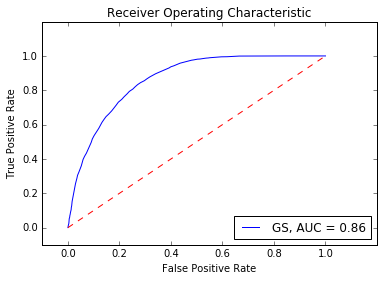

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)
print("Anonymization")
print(forest.score(X_t, Y_t))

Anonymization
0.510135135135


In [29]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)
print("Anonymization")
print(forest.score(X_t, Y_t))

Anonymization
0.626257545272
CPU times: user 5.7 s, sys: 120 ms, total: 5.82 s
Wall time: 2.38 s


In [34]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)
print("Anonymization")
print(forest.score(X_t, Y_t))

Anonymization
0.651633349586
CPU times: user 6.73 s, sys: 136 ms, total: 6.86 s
Wall time: 2.83 s


In [48]:
%%time
# Smart link 0.5
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)
print("Anonymization")
print(forest.score(X_t, Y_t))

Anonymization
0.528589315526
CPU times: user 4.14 s, sys: 112 ms, total: 4.25 s
Wall time: 2.05 s


In [49]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(X_t)
y_true = Y_t
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

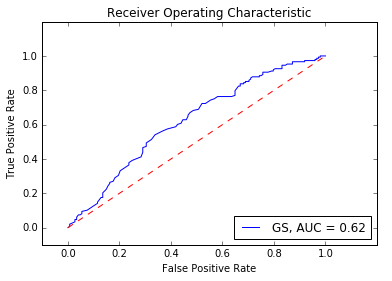

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

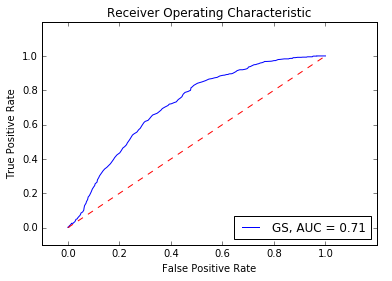

In [31]:
# Smart pertubation
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

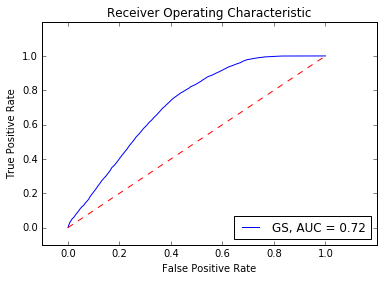

In [36]:
# Smart link 0.8
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

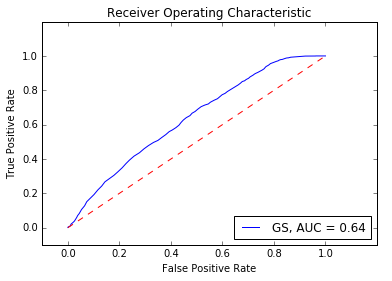

In [50]:
# Smart link 0.5
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()